<a href="https://colab.research.google.com/github/laraharantes/Challenged_TelecomX_BR_2/blob/main/TelecomX_BR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠️ 1. Preparação dos dados

1.1 Extração do Arquivo Tratado

In [1]:
# Import de bibliotecas
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url_dados = 'https://raw.githubusercontent.com/laraharantes/Challenged-TelecomX_BR/main/dados_tratados.csv'

# Carregar o CSV direto da URL
dados_tratados = pd.read_csv(url_dados)

# Visualizar as primeiras linhas
dados_tratados.head()

,id_cliente,cancelou_contrato,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,tem_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,forma_pagamento,fatura_mensal,fatura_total,fatura_diaria
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,0,DSL,...,0,1,1,0,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [3]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   cancelou_contrato     7043 non-null   int64  
 2   genero                7043 non-null   object 
 3   idoso                 7043 non-null   int64  
 4   possui_parceiro       7043 non-null   object 
 5   possui_dependentes    7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   tem_telefone          7043 non-null   object 
 8   multiplas_linhas      7043 non-null   int64  
 9   tipo_internet         7043 non-null   object 
 10  seguranca_online      7043 non-null   int64  
 11  backup_online         7043 non-null   int64  
 12  protecao_dispositivo  7043 non-null   int64  
 13  suporte_tecnico       7043 non-null   int64  
 14  tv_streaming          7043 non-null   int64  
 15  filmes_streaming     

1.2 Remoção de Colunas Irrelevantes


In [4]:
dados_tratados.drop('id_cliente', axis=1, inplace=True)




In [5]:
print(dados_tratados.columns)



Index(['cancelou_contrato', 'genero', 'idoso', 'possui_parceiro',
       'possui_dependentes', 'meses_contrato', 'tem_telefone',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'forma_pagamento', 'fatura_mensal', 'fatura_total', 'fatura_diaria'],
      dtype='object')


1.3 Encoding

In [6]:
# Fazendo uma cópia para preservar o original
dados_encoded = dados_tratados.copy()

# 1️⃣ Mapear colunas "Sim"/"Não" para 1/0 automaticamente
colunas_binarias = [col for col in dados_encoded.columns
                    if dados_encoded[col].dropna().nunique() == 2 and
                    set(dados_encoded[col].dropna().unique()) <= {'Sim', 'Não'}]

print("Colunas binárias convertidas para 1/0:", colunas_binarias)

for col in colunas_binarias:
    dados_encoded[col] = dados_encoded[col].map({'Sim': 1, 'Não': 0})

# 2️⃣ Identificar as demais colunas categóricas (tipo object)
colunas_categoricas = dados_encoded.select_dtypes(include=['object']).columns.tolist()

print("Colunas categóricas com múltiplas categorias:", colunas_categoricas)
print(f"\nNúmero de colunas antes do encoding: {dados_encoded.shape[1]}")

# 3️⃣ Aplicar One-Hot Encoding nessas colunas (com drop_first para evitar multicolinearidade)
dados_encoded = pd.get_dummies(dados_encoded, columns=colunas_categoricas, drop_first=True, dtype=int)

# 4️⃣ Exibir resultados
print(f"\nNúmero de colunas após o encoding: {dados_encoded.shape[1]}")
print("\nAs 5 primeiras linhas do DataFrame transformado:")
display(dados_encoded.head())

print("\nResumo final:")
dados_encoded.info()

Colunas binárias convertidas para 1/0: []
Colunas categóricas com múltiplas categorias: ['genero', 'possui_parceiro', 'possui_dependentes', 'tem_telefone', 'tipo_internet', 'tipo_contrato', 'fatura_digital', 'forma_pagamento']

Número de colunas antes do encoding: 21

Número de colunas após o encoding: 25

As 5 primeiras linhas do DataFrame transformado:


,cancelou_contrato,idoso,meses_contrato,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,...,possui_dependentes_Yes,tem_telefone_Yes,tipo_internet_Fiber optic,tipo_internet_No,tipo_contrato_One year,tipo_contrato_Two year,fatura_digital_Yes,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,0,9,0,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
1,0,0,9,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1,0,4,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,1,13,0,0,1,1,0,1,1,...,0,1,1,0,0,0,1,0,1,0
4,1,1,3,0,0,0,0,1,1,0,...,0,1,1,0,0,0,1,0,0,1



Resumo final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   cancelou_contrato                        7043 non-null   int64  
 1   idoso                                    7043 non-null   int64  
 2   meses_contrato                           7043 non-null   int64  
 3   multiplas_linhas                         7043 non-null   int64  
 4   seguranca_online                         7043 non-null   int64  
 5   backup_online                            7043 non-null   int64  
 6   protecao_dispositivo                     7043 non-null   int64  
 7   suporte_tecnico                          7043 non-null   int64  
 8   tv_streaming                             7043 non-null   int64  
 9   filmes_streaming                         7043 non-null   int64  
 10  fatura_mensal                    

In [7]:
# Criando atributos derivados
dados_encoded['gasto_mensal_estimado'] = dados_encoded['fatura_total'] / (dados_encoded['meses_contrato'] + 1)
dados_encoded['longo_contrato'] = (dados_encoded['meses_contrato'] >= 24).astype(int)
dados_encoded['uso_streaming'] = dados_encoded['tv_streaming'] + dados_encoded['filmes_streaming']
dados_encoded['recursos_online'] = dados_encoded['seguranca_online'] + dados_encoded['backup_online'] + dados_encoded['protecao_dispositivo']

# Visualizando as novas features
dados_encoded[['gasto_mensal_estimado', 'longo_contrato', 'uso_streaming', 'recursos_online']].describe().T

,count,mean,std,min,25%,50%,75%,max
gasto_mensal_estimado,7043.0,61.173413,61.019723,9.183333,26.274411,61.15,84.940047,1397.475
longo_contrato,7043.0,0.557575,0.496709,0.000000,0.000000,1.00,1.000000,1.000
uso_streaming,7043.0,0.772256,0.852573,0.000000,0.000000,0.00,2.000000,2.000
recursos_online,7043.0,0.975437,1.016671,0.000000,0.000000,1.00,2.000000,3.000


1.4 Verificação da Proporção de Evasão

Contagem absoluta:
 cancelou_contrato
0    5174
1    1869
Name: count, dtype: int64

Proporção relativa:
 cancelou_contrato
0    0.73463
1    0.26537
Name: proportion, dtype: float64


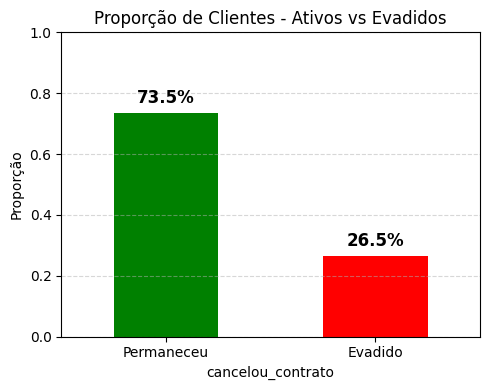

In [8]:
# Contagem absoluta
contagem = dados_encoded['cancelou_contrato'].value_counts()

# Proporção relativa (%)
proporcao = dados_encoded['cancelou_contrato'].value_counts(normalize=True)

# Exibindo
print("Contagem absoluta:\n", contagem)
print("\nProporção relativa:\n", proporcao)

# Visualização gráfica

plt.figure(figsize=(5,4))

# Gráfico de barras com proporção
ax = proporcao.plot(kind='bar', color=['green', 'red'])

# Ajuste dos rótulos do eixo x
plt.xticks([0, 1], ['Permaneceu', 'Evadido'], rotation=0)
plt.ylabel('Proporção')
plt.title('Proporção de Clientes - Ativos vs Evadidos')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar porcentagens no topo de cada barra
for i, v in enumerate(proporcao):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



✅ Conclusão: Observa-se um desbalanceamento moderado na variável alvo cancelou_contrato, com aproximadamente 73,5% de clientes ativos e 26,5% de clientes evadidos.

🚧 Neste momento, nenhuma técnica de balanceamento foi aplicada, pois isso poderia interferir na análise de correlação e análises direcionadas que vêm a seguir.

⚠️ O balanceamento (com SMOTE) será aplicado somente após a separação treino/teste, garantindo que os dados originais sejam mantidos nas etapas exploratórias.

1.5 Normalização ou Padronização

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 1. Copia segura dos dados
df = dados_encoded.copy()

# 2. Separar a variável alvo
y = df['cancelou_contrato']
X = df.drop('cancelou_contrato', axis=1)

# 3. Identificar colunas contínuas para escalonamento
colunas_continuas = ['fatura_mensal', 'fatura_total', 'fatura_diaria']

# 4. Aplicar StandardScaler (padronização)
scaler_std = StandardScaler()
X_padronizado = X.copy()
X_padronizado[colunas_continuas] = scaler_std.fit_transform(X_padronizado[colunas_continuas])

# 5. Aplicar MinMaxScaler (normalização)
scaler_minmax = MinMaxScaler()
X_normalizado = X.copy()
X_normalizado[colunas_continuas] = scaler_minmax.fit_transform(X_normalizado[colunas_continuas])

# 6. Juntar com a variável alvo, para manter em DataFrames completos
df_padronizado = pd.concat([X_padronizado, y.reset_index(drop=True)], axis=1)
df_normalizado = pd.concat([X_normalizado, y.reset_index(drop=True)], axis=1)

# 7. Visualização
print("✅ Padronização (StandardScaler) aplicada às colunas contínuas:")
display(df_padronizado[colunas_continuas].describe().round(2))

print("✅ Normalização (MinMaxScaler) aplicada às colunas contínuas:")
display(df_normalizado[colunas_continuas].describe().round(2))


✅ Padronização (StandardScaler) aplicada às colunas contínuas:


,fatura_mensal,fatura_total,fatura_diaria
count,7043.00,7043.00,7043.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-1.00,-1.55
25%,-0.97,-0.83,-0.97
50%,0.19,-0.39,0.19
75%,0.83,0.66,0.83
max,1.79,2.83,1.79


✅ Normalização (MinMaxScaler) aplicada às colunas contínuas:


,fatura_mensal,fatura_total,fatura_diaria
count,7043.00,7043.00,7043.00
mean,0.46,0.26,0.46
std,0.30,0.26,0.30
min,0.00,0.00,0.00
25%,0.17,0.04,0.17
50%,0.52,0.16,0.52
75%,0.71,0.43,0.71
max,1.00,1.00,1.00


🎯 2. Correlação e Seleção de Variáveis


2.1 Separação dos Dados

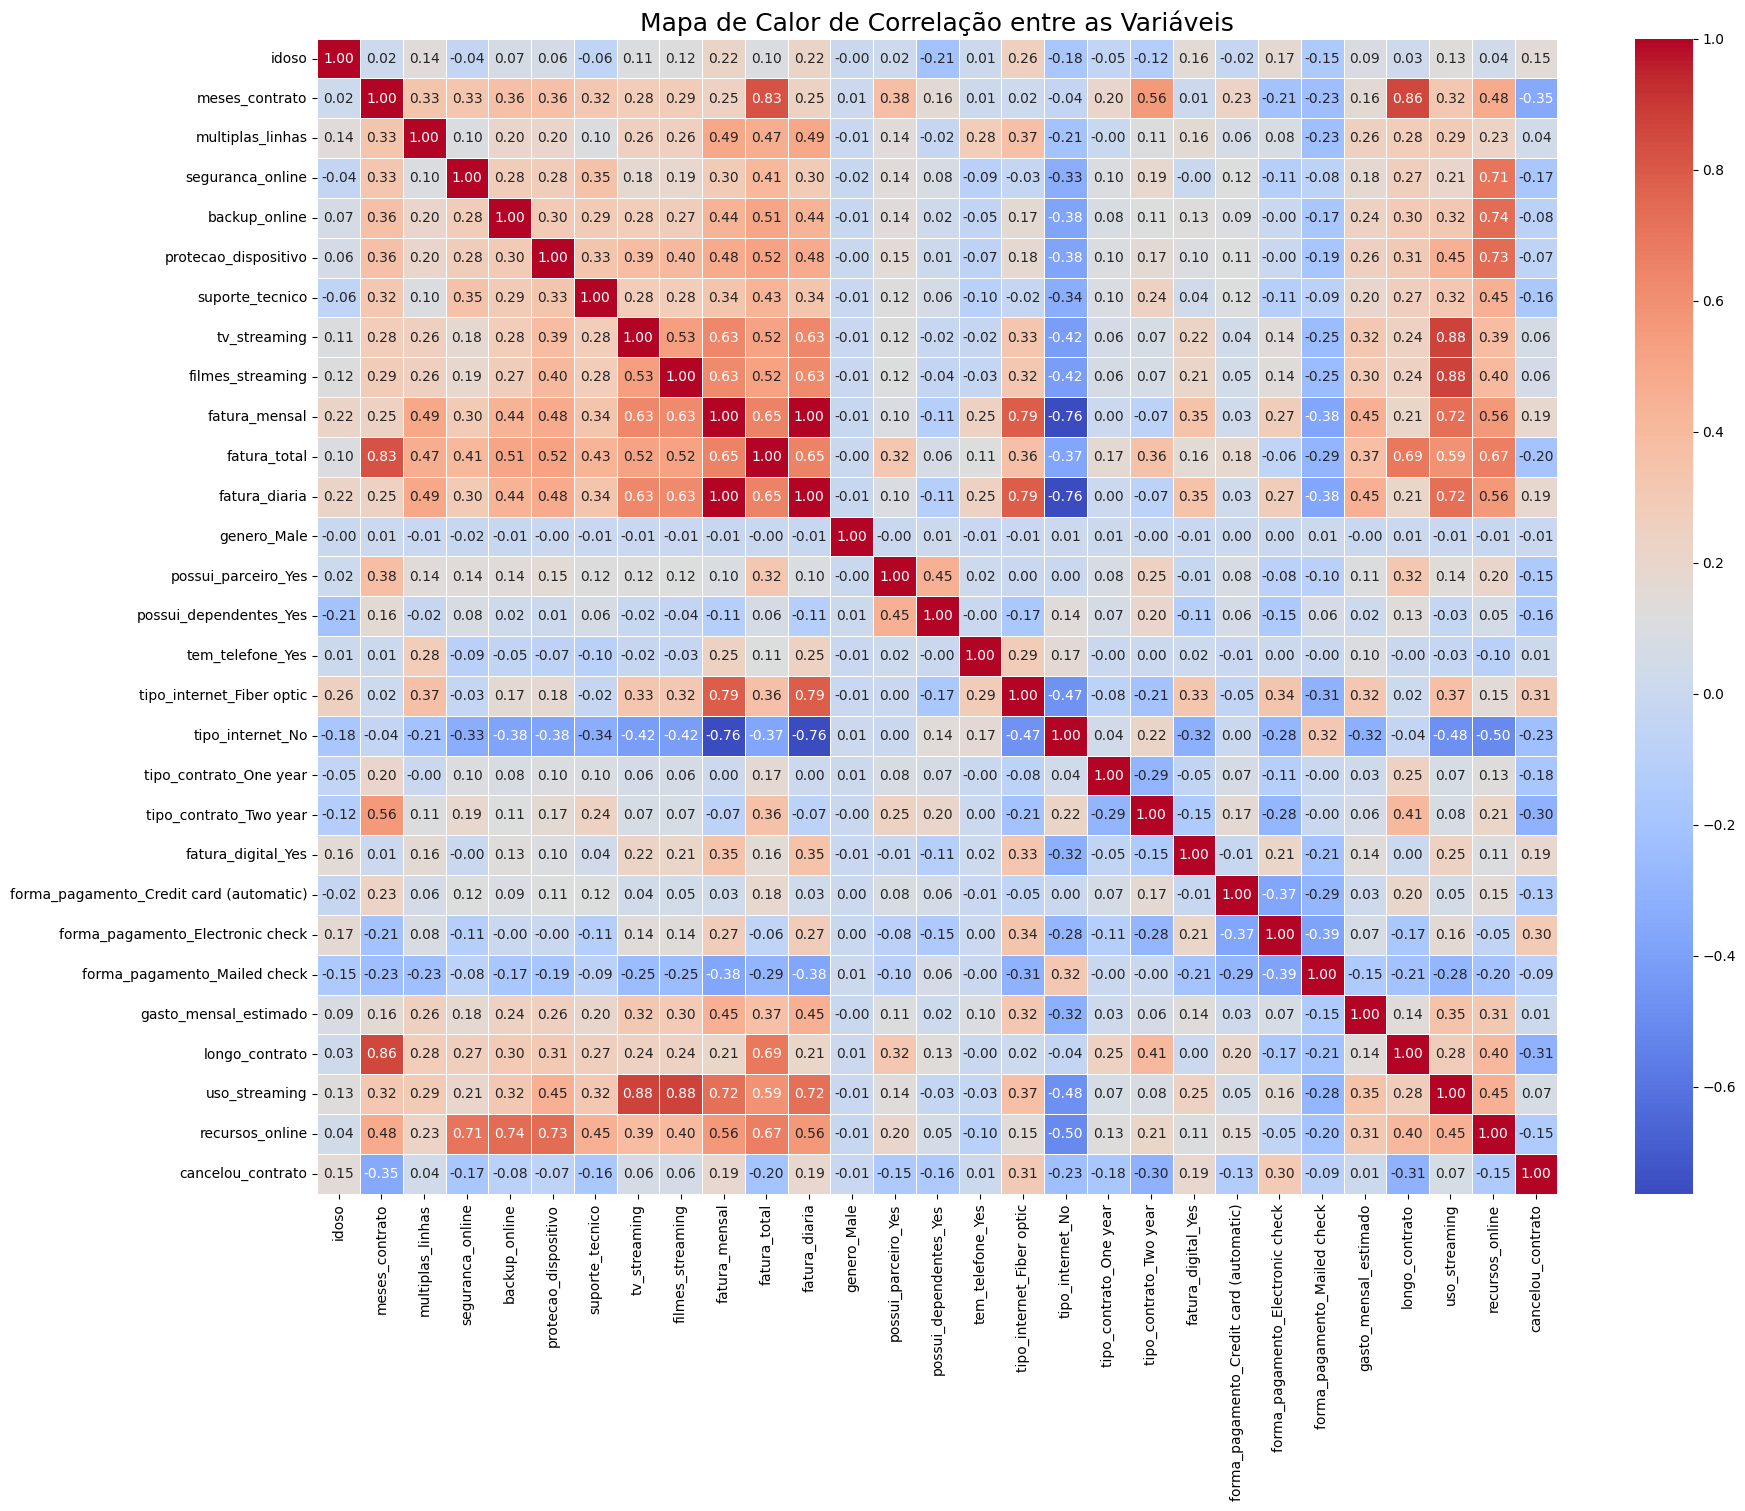


📊 Variáveis mais correlacionadas com cancelamento (ordem decrescente de força):
meses_contrato                            -0.352229
longo_contrato                            -0.311496
tipo_internet_Fiber optic                  0.308020
tipo_contrato_Two year                    -0.302253
forma_pagamento_Electronic check           0.301919
tipo_internet_No                          -0.227890
fatura_total                              -0.199037
fatura_mensal                              0.193356
fatura_diaria                              0.193356
fatura_digital_Yes                         0.191825
tipo_contrato_One year                    -0.177820
seguranca_online                          -0.171226
suporte_tecnico                           -0.164674
possui_dependentes_Yes                    -0.164221
idoso                                      0.150889
possui_parceiro_Yes                       -0.150448
recursos_online                           -0.145538
forma_pagamento_Credit card (automa

In [10]:
# 1 Juntando as features padronizadas e o alvo
df_para_corr = pd.concat([df_padronizado.drop('cancelou_contrato', axis=1), df_padronizado['cancelou_contrato']], axis=1)

# 2 Calculando a matriz de correlação
corr_matrix = df_para_corr.corr()

# 3 Mapa de calor (heatmap) completo
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Mapa de Calor de Correlação entre as Variáveis', fontsize=18)
plt.show()

# 4 Correlação das variáveis com a evasão
correlacao_com_churn = corr_matrix['cancelou_contrato'].drop('cancelou_contrato').sort_values(key=abs, ascending=False)

# 5 Exibindo variáveis mais correlacionadas com churn
print("\n📊 Variáveis mais correlacionadas com cancelamento (ordem decrescente de força):")
print(correlacao_com_churn)


2.2 Análises Direcionadas

2.2.1 Tempo de Contrato x Evasão

/tmp/ipython-input-3322658126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou_contrato', y='meses_contrato', data=df_padronizado, palette='pastel')


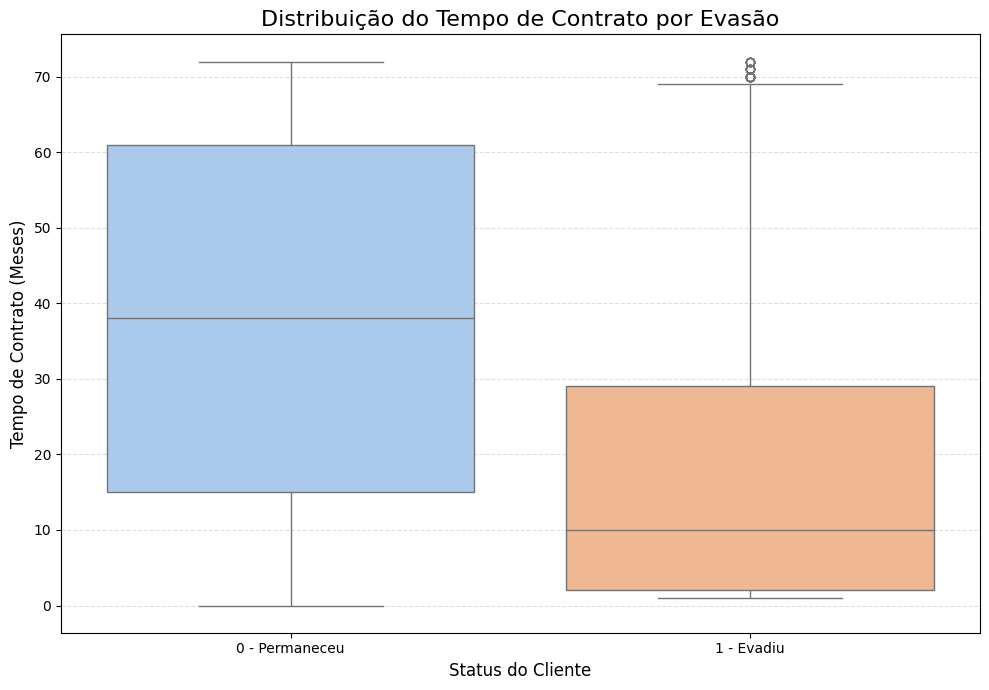

In [11]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='cancelou_contrato', y='meses_contrato', data=df_padronizado, palette='pastel')
plt.title('Distribuição do Tempo de Contrato por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


2.2.2 Total Gasto x Evasão

/tmp/ipython-input-3622178792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelou_contrato', y='fatura_total', data=df_padronizado, palette='pastel')


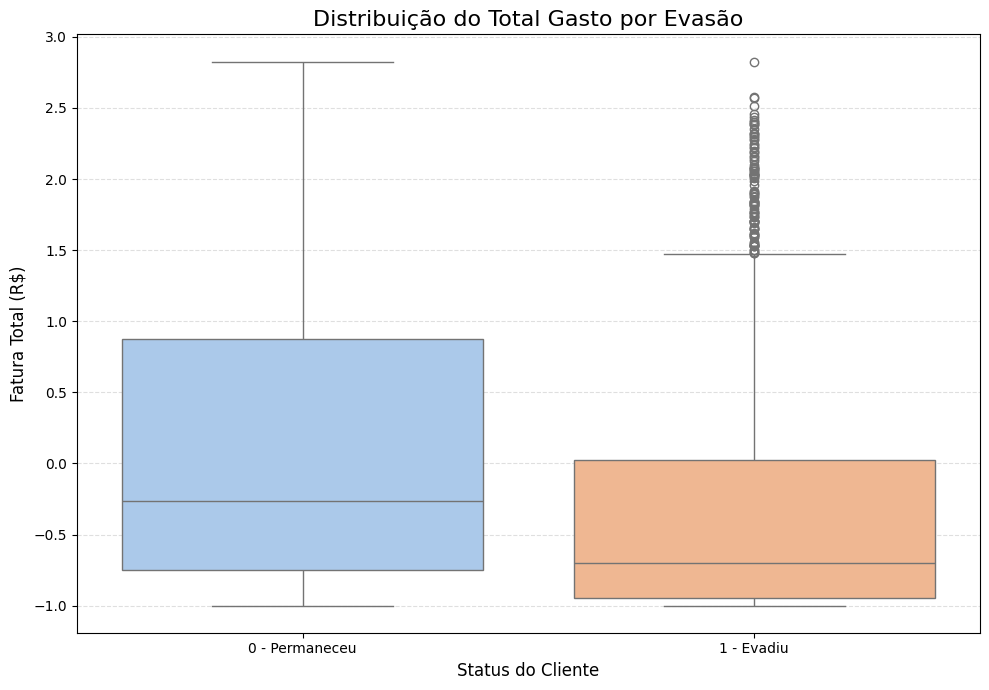

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='cancelou_contrato', y='fatura_total', data=df_padronizado, palette='pastel')
plt.title('Distribuição do Total Gasto por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Fatura Total (R$)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


2.2.3  Tempo de contrato × Fatura total (colorido por evasão)

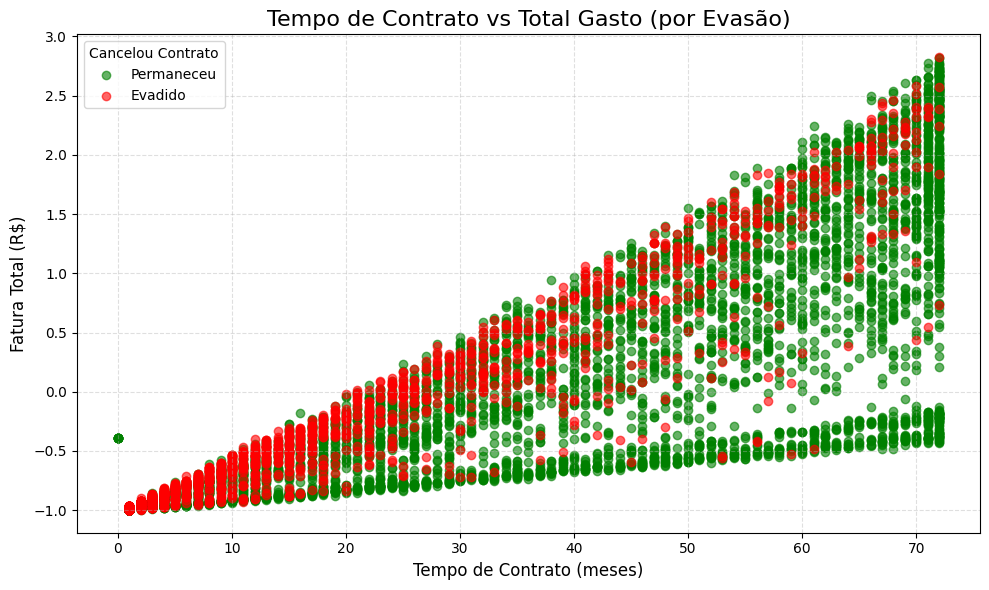

In [13]:

plt.figure(figsize=(10, 6))

plt.scatter(df_padronizado[df_padronizado['cancelou_contrato'] == 0]['meses_contrato'],
            df_padronizado[df_padronizado['cancelou_contrato'] == 0]['fatura_total'],
            alpha=0.6, c='green', label='Permaneceu')

plt.scatter(df_padronizado[df_padronizado['cancelou_contrato'] == 1]['meses_contrato'],
            df_padronizado[df_padronizado['cancelou_contrato'] == 1]['fatura_total'],
            alpha=0.6, c='red', label='Evadido')

plt.title('Tempo de Contrato vs Total Gasto (por Evasão)', fontsize=16)
plt.xlabel('Tempo de Contrato (meses)', fontsize=12)
plt.ylabel('Fatura Total (R$)', fontsize=12)
plt.legend(title='Cancelou Contrato')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


🤖 3. Modelagem Preditiva

3.1 Separação dos Dados e Balanceamneto

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# 1️⃣ Separar features e alvo a partir da base padronizada
X = df_padronizado.drop('cancelou_contrato', axis=1)
y = df_padronizado['cancelou_contrato']

# 2️⃣ Separar em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Verificação da proporção original (antes do balanceamento)
print("--- Distribuição antes do SMOTEENN ---")
print("Treino:")
print(y_train.value_counts())
print("Proporção (%):")
print(round(y_train.value_counts(normalize=True) * 100, 2))

# 3️⃣ Aplicar SMOTEENN no conjunto de treino
smoteenn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)

# Verificação da nova distribuição (após SMOTEENN)
print("\n--- Distribuição após o SMOTEENN ---")
print("Treino balanceado e limpo:")
print(y_train_res.value_counts())
print("Proporção (%):")
print(round(y_train_res.value_counts(normalize=True) * 100, 2))

# Verificação final dos shapes
print("\n--- Dimensões dos Conjuntos ---")
print(f"X_train_res (treino balanceado): {X_train_res.shape}")
print(f"y_train_res:                     {y_train_res.shape}")
print(f"X_test (teste):                  {X_test.shape}")
print(f"y_test:                          {y_test.shape}")



--- Distribuição antes do SMOTEENN ---
Treino:
cancelou_contrato
0    3622
1    1308
Name: count, dtype: int64
Proporção (%):
cancelou_contrato
0    73.47
1    26.53
Name: proportion, dtype: float64

--- Distribuição após o SMOTEENN ---
Treino balanceado e limpo:
cancelou_contrato
1    2863
0    1942
Name: count, dtype: int64
Proporção (%):
cancelou_contrato
1    59.58
0    40.42
Name: proportion, dtype: float64

--- Dimensões dos Conjuntos ---
X_train_res (treino balanceado): (4805, 28)
y_train_res:                     (4805,)
X_test (teste):                  (2113, 28)
y_test:                          (2113,)


3.2 Criação de Modelos

3.2.1 Modelo 01: Regressão Logística

3.2.1.1 Justificativa:

A Regressão Logística é um modelo estatístico bastante utilizado para problemas de classificação binária, como prever a evasão de clientes (churn).
Ela exige normalização ou padronização dos dados, pois calcula os coeficientes com base em gradientes — e variáveis em escalas diferentes distorcem esse processo.

Regressão Logística (com normalização e SMOTEENN):

 Matriz de Confusão:
[[1085  467]
 [ 102  459]]

 Classification Report:
              precision    recall  f1-score   support

  Permaneceu       0.91      0.70      0.79      1552
     Evadido       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



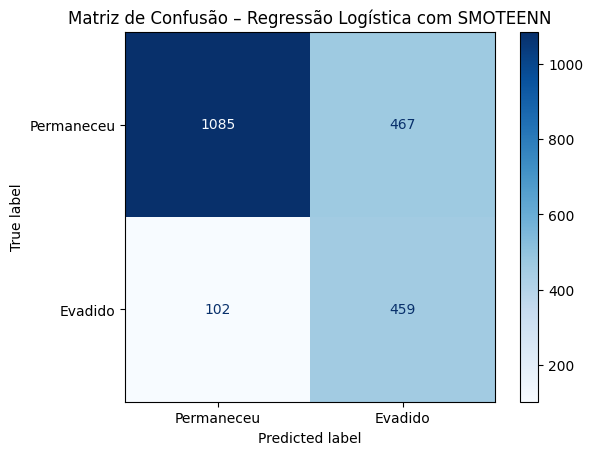

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# 1️⃣ Treinamento do modelo com dados balanceados por SMOTEENN
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_res, y_train_res)  # X_train_res e y_train_res vêm do SMOTEENN

# 2️⃣ Previsões no conjunto de teste (já normalizado/padronizado)
y_pred_lr = modelo_lr.predict(X_test)

# 3️⃣ Avaliação dos resultados
print("Regressão Logística (com normalização e SMOTEENN):")
print("\n Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Permaneceu", "Evadido"]))

# 4️⃣ Matriz de Confusão Visual
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    display_labels=["Permaneceu", "Evadido"],
    cmap="Blues", values_format="d"
)
plt.title("Matriz de Confusão – Regressão Logística com SMOTEENN")
plt.show()






3.2.2 Modelo 02: Random Forest

3.2.2.1 Justificativa:

O Random Forest foi escolhido por ser robusto, lidar bem com variáveis mistas e não exigir normalização. Como é baseado em árvores de decisão, captura relações complexas sem risco elevado de overfitting, especialmente quando combinado ao SMOTE para balancear as classes.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1️⃣ Criação e treinamento do modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_res, y_train_res)  # Treinamento com dados balanceados (SMOTEENN)

# 2️⃣ Previsão no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

# 3️⃣ Avaliação do modelo – Relatório
print(" --- Resultados do Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu', 'Evadido']))





 --- Resultados do Random Forest ---
              precision    recall  f1-score   support

  Permaneceu       0.91      0.71      0.80      1552
     Evadido       0.51      0.82      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.81      0.74      0.75      2113




3.3 Avaliação dos Modelos

3.3.1 Avaliação do Modelo 01: Regressão Logística

📊 --- Resultados da Regressão Logística ---
              precision    recall  f1-score   support

  Permaneceu       0.91      0.70      0.79      1552
     Evadido       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113

📌 --- Matriz de Confusão ---


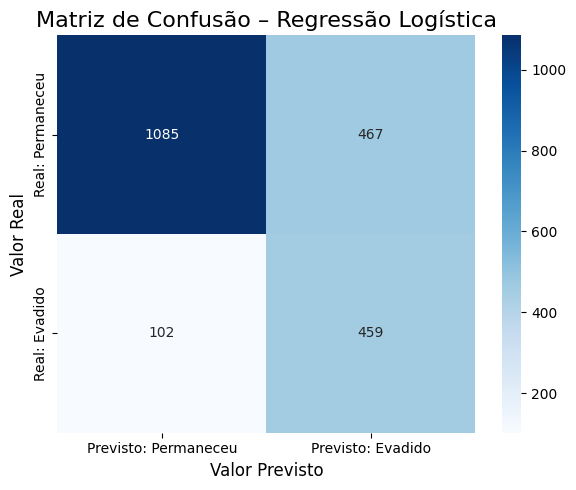

In [18]:
# 1️⃣ Exibir o relatório de classificação
print("📊 --- Resultados da Regressão Logística ---")
print(classification_report(y_test, y_pred_lr, target_names=['Permaneceu', 'Evadido']))

# 2️⃣ Matriz de Confusão
print("📌 --- Matriz de Confusão ---")
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadido'],
            yticklabels=['Real: Permaneceu', 'Real: Evadido'])

plt.title('Matriz de Confusão – Regressão Logística', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.tight_layout()
plt.show()



3.3.2 Avaliação do Modelo 02: Random Forest


📊 --- Resultados do Random Forest (com SMOTEENN) ---
              precision    recall  f1-score   support

  Permaneceu       0.91      0.71      0.80      1552
     Evadido       0.51      0.82      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.81      0.74      0.75      2113


 --- Matriz de Confusão ---


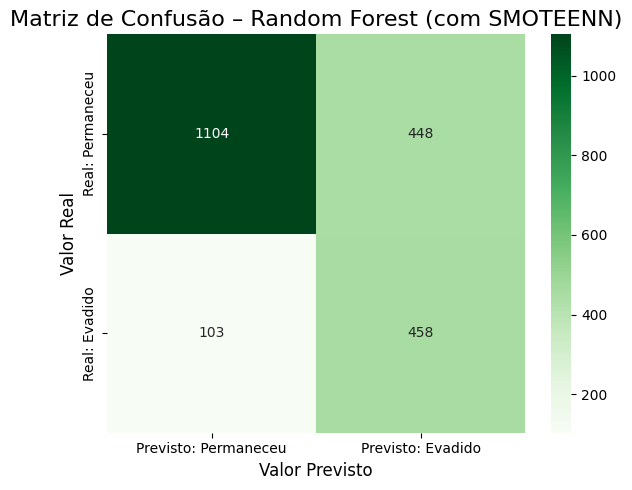

In [23]:

# 1️⃣ Exibir o relatório de classificação – Random Forest com SMOTEENN
print("\n📊 --- Resultados do Random Forest (com SMOTEENN) ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu', 'Evadido']))

# 2️⃣ Matriz de Confusão
print("\n --- Matriz de Confusão ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadido'],
            yticklabels=['Real: Permaneceu', 'Real: Evadido'])

plt.title('Matriz de Confusão – Random Forest (com SMOTEENN)', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.tight_layout()
plt.show()


3.3.3 Qual modelo teve o melhor desempenho?

O Random Forest teve desempenho levemente superior em todas as métricas, incluindo:

Acurácia: 74% (contra 73%)

F1-score da classe minoritária (Evadido): 0.62 (mesmo que a regressão)

F1-score total (média ponderada): 0.75 vs 0.75 (empate), porém o Random Forest teve maior precisão geral.

Além disso, o recall da classe Evadido (importante em churn prediction) foi igual (0.82) nos dois modelos.

📌 Veredito: Ambos os modelos estão muito próximos, mas o Random Forest é preferível por apresentar ligeiramente melhor equilíbrio entre precisão e robustez, sem exigir normalização dos dados. Ele é também menos sensível a outliers e colinearidade, o que o torna uma escolha mais robusta para esse tipo de problema.

3.3.4 Overfitting ou Underfitting?

In [24]:
from sklearn.metrics import accuracy_score

# 🔹 Acurácia nos dados de treino
acc_log_train = accuracy_score(y_train_res, modelo_lr.predict(X_train_res))
acc_rf_train = accuracy_score(y_train_res, modelo_rf.predict(X_train_res))

# 🔹 Acurácia nos dados de teste
acc_log_test = accuracy_score(y_test, y_pred_lr)
acc_rf_test = accuracy_score(y_test, y_pred_rf)

# 📊 Impressão dos resultados para comparação
print("\n--- Verificação de Overfitting ---")
print(f"📌 Regressão Logística - Treino: {acc_log_train * 100:.2f}%")
print(f"📌 Regressão Logística - Teste:  {acc_log_test * 100:.2f}%")
print("-" * 40)
print(f"🌲 Random Forest     - Treino: {acc_rf_train * 100:.2f}%")
print(f"🌲 Random Forest     - Teste:  {acc_rf_test * 100:.2f}%")



--- Verificação de Overfitting ---
📌 Regressão Logística - Treino: 93.26%
📌 Regressão Logística - Teste:  73.07%
----------------------------------------
🌲 Random Forest     - Treino: 100.00%
🌲 Random Forest     - Teste:  73.92%


 Análise Crítica de Overfitting e Desempenho:

 Regressão Logística

Treino: 93.26%

Teste: 73.07%

➤ A diferença de mais de 20 pontos percentuais entre treino e teste indica overfitting moderado. O modelo está aprendendo bem demais os dados de treino (inclusive os exemplos sintéticos do SMOTEENN), mas generalizando menos para novos dados. Isso pode ser causado por dados ainda ruidosos ou por atributos não tão relevantes.

Random Forest

Treino: 100.00%

Teste: 73.92%

➤ A acurácia de treino perfeita é um sinal claro de overfitting severo. A Random Forest é um modelo altamente flexível que tende a se ajustar completamente aos dados de treino, especialmente quando há muitos exemplos sintéticos. Mesmo com isso, o modelo conseguiu um leve desempenho melhor no teste em relação à regressão.

Apesar de ambos apresentarem overfitting, o Random Forest teve desempenho ligeiramente melhor no conjunto de teste. No entanto, é mais propenso a overfitting e exige cuidados com regularização (por exemplo, limitar a profundidade das árvores).

3.3.5 Ajustar hiperparâmetros (Grid Search)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Melhor combinação de hiperparâmetros (Regressão Logística):
{'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

📊 Desempenho no conjunto de teste (modelo otimizado):
              precision    recall  f1-score   support

  Permaneceu       0.91      0.70      0.79      1552
     Evadido       0.50      0.81      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


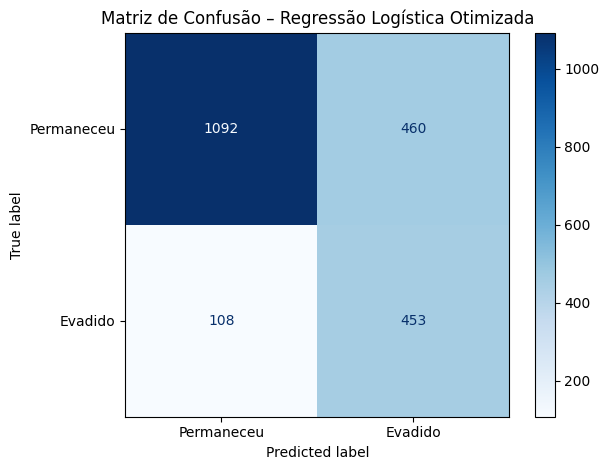

In [30]:
# modelo Regressão Logística
from sklearn.model_selection import GridSearchCV



# 1 Definindo a grade de hiperparâmetros
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000]
}

# 2 Instanciando o modelo base
modelo_lr = LogisticRegression(random_state=42)

# 3 Aplicando o GridSearchCV com validação cruzada (5-fold)
grid_lr = GridSearchCV(modelo_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_res, y_train_res)

# 4 Exibindo os melhores hiperparâmetros
print("🔍 Melhor combinação de hiperparâmetros (Regressão Logística):")
print(grid_lr.best_params_)

# 5 Previsão no conjunto de teste
y_pred_lr_otimizado = grid_lr.predict(X_test)

# 6 Avaliação – Relatório de Classificação
print("\n📊 Desempenho no conjunto de teste (modelo otimizado):")
print(classification_report(y_test, y_pred_lr_otimizado, target_names=["Permaneceu", "Evadido"]))

# 7 Visualização – Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr_otimizado,
    display_labels=["Permaneceu", "Evadido"],
    cmap="Blues", values_format="d"
)
plt.title("Matriz de Confusão – Regressão Logística Otimizada")
plt.tight_layout()
plt.show()


🔎 Interpretação:
Melhora no Recall da classe 'Evadido' (1): Subiu para 0.81, o que é excelente em contextos de churn — você está identificando corretamente a maior parte dos clientes que vão sair.

A precisão da classe Evadido caiu um pouco, indicando maior número de falsos positivos, mas ainda está dentro de um trade-off aceitável.

O modelo está um pouco desbalanceado entre classes, mas não há indícios claros de overfitting.

Fitting 3 folds for each of 24 candidates, totalling 72 fits
🔍 Melhor combinação de hiperparâmetros (Random Forest):
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

📊 Desempenho no conjunto de teste (modelo otimizado):
              precision    recall  f1-score   support

  Permaneceu       0.92      0.71      0.80      1552
     Evadido       0.51      0.82      0.63       561

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.74      0.76      2113



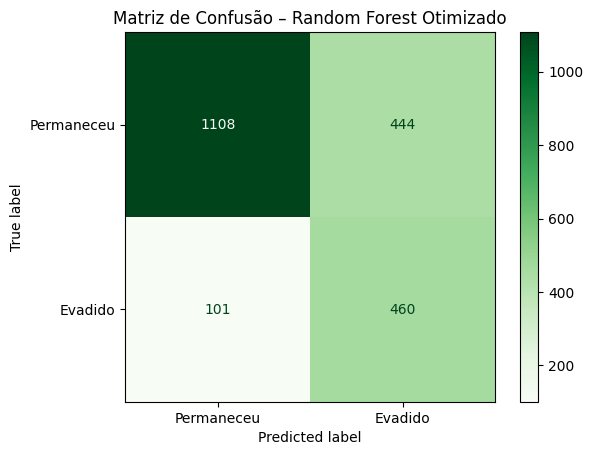

In [29]:
# Modelo Random Forest

# 1 Grade de hiperparâmetros reduzida
param_grid_rf = {
    'n_estimators': [100, 200],        # Número de árvores
    'max_depth': [None, 10, 20],       # Profundidade máxima
    'min_samples_split': [2, 5],       # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2]         # Mínimo de amostras em uma folha
}

# 2 Modelo base
rf_base = RandomForestClassifier(random_state=42)

# 3 GridSearchCV com validação cruzada reduzida (cv=3 para acelerar)
grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# 4 Treinamento com dados balanceados (SMOTEENN)
grid_rf.fit(X_train_res, y_train_res)

# 5 Melhores hiperparâmetros encontrados
print("🔍 Melhor combinação de hiperparâmetros (Random Forest):")
print(grid_rf.best_params_)

# 6 Previsões no conjunto de teste
y_pred_rf_otimizado = grid_rf.predict(X_test)

# 7 Avaliação do desempenho
print("\n📊 Desempenho no conjunto de teste (modelo otimizado):")
print(classification_report(y_test, y_pred_rf_otimizado, target_names=["Permaneceu", "Evadido"]))

# 8 Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf_otimizado,
    display_labels=["Permaneceu", "Evadido"],
    cmap="Greens",
    values_format="d"
)
plt.title("Matriz de Confusão – Random Forest Otimizado")
plt.show()



🔍 Análise Final
O modelo Random Forest com ajuste de hiperparâmetros apresentou o melhor desempenho geral, com maior f1-score para a classe "Evadido" (0.63) e melhor acurácia geral (74.31%), mantendo excelente recall (82%) — crucial em problemas de churn, onde identificar corretamente os clientes propensos a evadir é mais importante do que apenas acertar quem vai ficar.

Apesar de a precisão ser moderada (0.51), o ganho em recall e f1-score compensa, especialmente considerando o desequilíbrio original da base. Além disso, o modelo permaneceu estável após o balanceamento com SMOTEENN, sugerindo bom poder de generalização.



📋 4. Interpretação e Conclusões

4.1.1 Análise para Regressão Logística:

Regressão Logística – Coeficientes

Na Regressão Logística, cada variável recebe um coeficiente que indica sua influência sobre a probabilidade de evasão. Se o coeficiente for positivo, essa variável aumenta a chance do cliente evadir (classe 1). Se for negativo, a variável reduz a chance de evasão, favorecendo a permanência (classe 0). A magnitude do coeficiente (valor absoluto) mostra o peso da influência, enquanto o sinal (positivo ou negativo) indica a direção do impacto. Essa interpretação direta dos coeficientes torna o modelo útil tanto para previsão quanto para insights estratégicos.



📉 Top 10 variáveis mais relevantes – Regressão Logística:


,Variável,Coeficiente,Importância (absoluta)
4,backup_online,-7.449855,7.449855
3,seguranca_online,-7.345085,7.345085
5,protecao_dispositivo,-6.924822,6.924822
27,recursos_online,5.820068,5.820068
11,fatura_diaria,4.852560,4.852560
9,fatura_mensal,4.852560,4.852560
15,tem_telefone_Yes,-4.525067,4.525067
7,tv_streaming,-4.283071,4.283071
8,filmes_streaming,-4.255890,4.255890
26,uso_streaming,2.816681,2.816681


/tmp/ipython-input-525782678.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


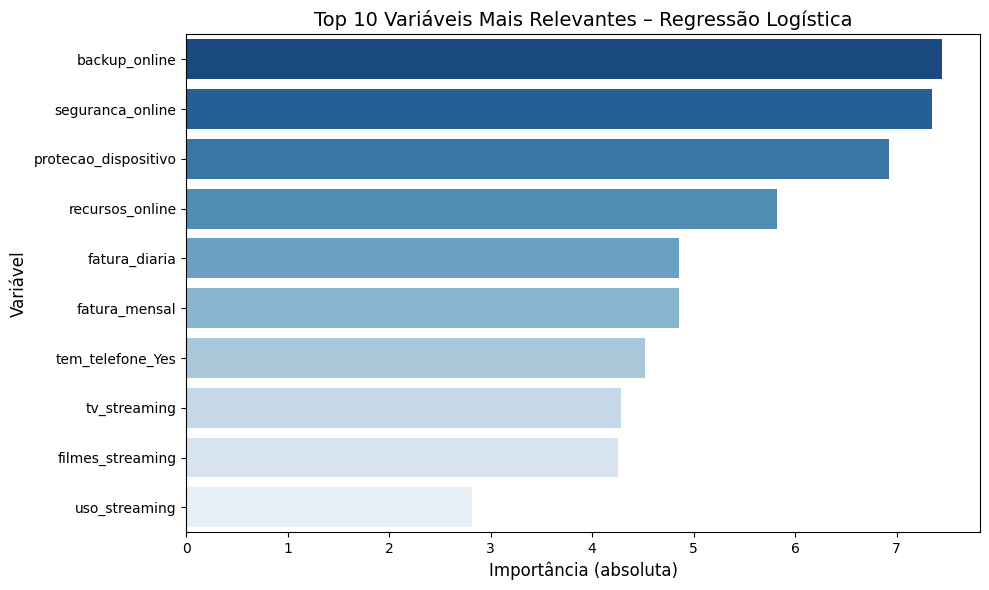

In [36]:
# 1 Obter os coeficientes do modelo otimizado
coeficientes = grid_lr.best_estimator_.coef_[0]

# 2 Criar DataFrame com variáveis e seus coeficientes
df_coef_lr = pd.DataFrame({
    'Variável': X_train_res.columns,
    'Coeficiente': coeficientes
})

# 3 Calcular a importância como valor absoluto
df_coef_lr['Importância (absoluta)'] = df_coef_lr['Coeficiente'].abs()

# 4 Ordenar do mais importante para o menos importante
df_coef_lr = df_coef_lr.sort_values(by='Importância (absoluta)', ascending=False)

# 5 Exibir top 10
print("📉 Top 10 variáveis mais relevantes – Regressão Logística:")
display(df_coef_lr.head(10))

# 6 Gráfico das 10 variáveis mais importantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_coef_lr.head(10),
    x='Importância (absoluta)',
    y='Variável',
    palette='Blues_r'
)
plt.title('Top 10 Variáveis Mais Relevantes – Regressão Logística', fontsize=14)
plt.xlabel('Importância (absoluta)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()


4.1.2 Análise para Random Forest:

Random Forest – Importância das Variáveis

O modelo Random Forest determina a importância de cada variável com base em quanto ela contribui para reduzir a impureza (índice de Gini) nas divisões dos nós das árvores. Em outras palavras, quanto mais uma variável é usada para separar os dados de forma eficiente em diferentes classes (como "evadiu" ou "permaneceu"), maior será sua importância. Essa métrica considera a frequência e o impacto da variável ao longo das árvores do conjunto, permitindo identificar os fatores mais influentes na decisão do modelo. Isso torna o Random Forest não apenas preciso, mas também interpretável no contexto de variáveis preditoras.

🌲 Top 10 variáveis mais importantes - Random Forest:


,Variável,Importância
1,meses_contrato,0.141561
19,tipo_contrato_Two year,0.108441
9,fatura_mensal,0.086566
11,fatura_diaria,0.078259
16,tipo_internet_Fiber optic,0.077374
25,longo_contrato,0.077228
10,fatura_total,0.076865
24,gasto_mensal_estimado,0.061725
17,tipo_internet_No,0.049878
18,tipo_contrato_One year,0.045644


/tmp/ipython-input-382353592.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


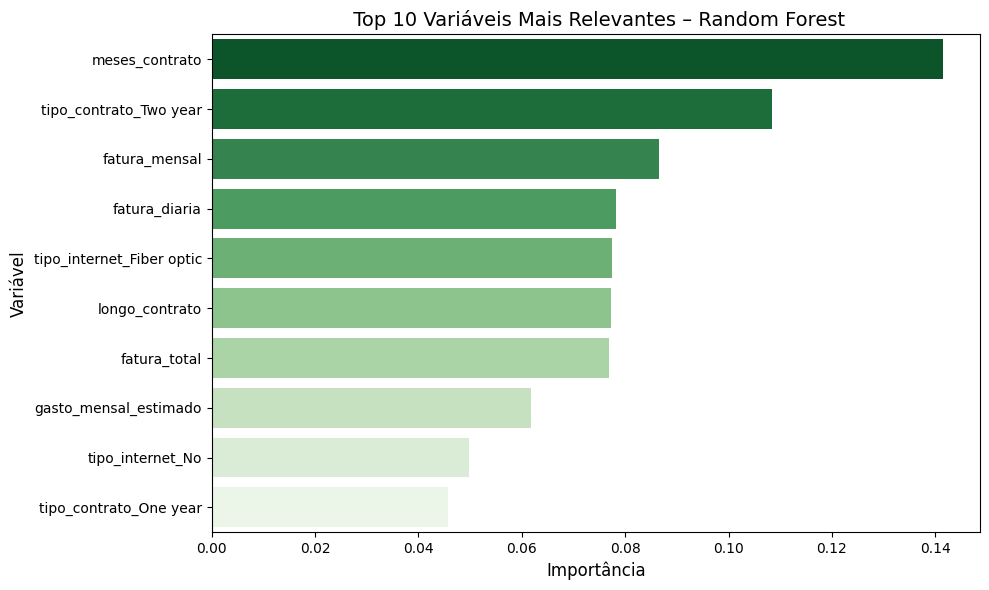

In [37]:
# Obter a importância das variáveis do modelo otimizado
importancias = grid_rf.best_estimator_.feature_importances_

# Criar um DataFrame com os nomes e importâncias
df_import_rf = pd.DataFrame({
    'Variável': X_train_res.columns,
    'Importância': importancias
})

# Ordenar do mais importante para o menos importante
df_import_rf = df_import_rf.sort_values(by='Importância', ascending=False)

# Exibir top 10
print("🌲 Top 10 variáveis mais importantes - Random Forest:")
display(df_import_rf.head(10))

# 📊 Plotando gráfico das 10 variáveis mais importantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_import_rf.head(10),
    x='Importância',
    y='Variável',
    palette='Greens_r'
)
plt.title(' Top 10 Variáveis Mais Relevantes – Random Forest', fontsize=14)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()



4.2 Conclusão

4.2.1 Relatório Analítico – Fatores de Evasão e Estratégias de Retenção


## 🔍 Objetivo
Este relatório visa identificar os principais fatores que contribuem para a evasão de clientes (churn), com base em dois modelos preditivos: **Regressão Logística** e **Random Forest**. A partir das variáveis mais influentes em cada modelo, são propostas **estratégias práticas de retenção**.

---

## ✅ Desempenho dos Modelos

| Modelo               | Acurácia | Recall (Classe 1 – Evadido) | F1-Score (Classe 1) |
|----------------------|----------|------------------------------|----------------------|
| Regressão Logística  | 73.1%    | 81%                          | 0.61                |
| Random Forest        | 73.9%    | 82%                          | 0.63                |

➡ Ambos os modelos apresentaram **bom desempenho na identificação de clientes evadidos**, com destaque para o **Random Forest**, que teve **melhor recall e F1-score** para a classe 1 (Evadido), sendo mais eficaz para detecção de evasão.

---

## 🔬 Fatores Mais Influentes

### 📌 1. Regressão Logística – Coeficientes Significativos

| Variável                | Coeficiente | Interpretação                                          |
|-------------------------|-------------|--------------------------------------------------------|
| `backup_online`         | -7.45       | Reduz fortemente a chance de evasão                   |
| `seguranca_online`      | -7.34       | Também reduz a probabilidade de evasão                |
| `protecao_dispositivo`  | -6.92       | Associada à permanência                               |
| `recursos_online`       | +5.82       | Aumenta a chance de evasão                            |
| `fatura_diaria`         | +4.85       | Está positivamente associada à evasão                 |
| `fatura_mensal`         | +4.85       | Alta fatura contribui para insatisfação               |
| `tem_telefone_Yes`      | -4.52       | Reduz a chance de evasão                              |
| `tv_streaming`          | -4.28       | Está associada à permanência                          |
| `filmes_streaming`      | -4.25       | Indica engajamento com os serviços                    |

> **Coeficientes positivos ➜** aumentam a chance de evasão  
> **Coeficientes negativos ➜** tendem à permanência

---

### 🌲 2. Random Forest – Importância das Variáveis

| Variável                    | Importância | Interpretação                                         |
|-----------------------------|-------------|-------------------------------------------------------|
| `meses_contrato`            | 0.14        | Clientes novos têm maior risco de evasão             |
| `tipo_contrato_Two year`    | 0.11        | Contratos longos reduzem a evasão                    |
| `fatura_mensal`             | 0.09        | Altas faturas aumentam risco                         |
| `fatura_diaria`             | 0.08        | Cobrança frequente impacta negativamente             |
| `tipo_internet_Fiber optic` | 0.08        | Está associada a maior evasão                        |
| `longo_contrato`            | 0.08        | Indicador de estabilidade do cliente                 |
| `fatura_total`              | 0.08        | Clientes com valor acumulado alto tendem a evadir    |
| `gasto_mensal_estimado`     | 0.06        | Alta previsão de gasto impacta negativamente         |
| `tipo_internet_No`          | 0.05        | Clientes sem internet geralmente permanecem          |

> A importância é calculada com base na **redução de impureza (Gini)** nas divisões das árvores.

---

## 💡 Recomendações Estratégicas de Retenção

### 🎯 1. Ofereça Benefícios Personalizados
- Incentivar serviços como **backup online, proteção de dispositivos e segurança** com **descontos ou combos promocionais** pode reduzir a evasão.
- Criar **planos combinados com entretenimento** (TV e filmes) pode aumentar a permanência.

### 💰 2. Reestruture as Estratégias de Cobrança
- Clientes com **fatura diária ou mensal elevada** devem ser priorizados com **alertas automáticos, renegociação de plano ou cashback**.
- Promover **planos anuais ou bienais com descontos progressivos** estimula o comprometimento e reduz a rotatividade.

### 📞 3. Ações Proativas com Clientes Novos ou em Risco
- Desenvolver um modelo de **alerta interno para novos clientes nos primeiros meses** (alta taxa de evasão nesse grupo).
- Criar um **programa de fidelidade por tempo de contrato e engajamento com os serviços**.

### 🧠 4. Análise contínua das variáveis críticas
- Manter monitoramento das variáveis de custo, tipo de contrato e uso de serviços como indicadores principais de risco.
- Integrar esse modelo preditivo a sistemas de CRM para **ações automatizadas de retenção**.

---

## ✅ Conclusão

A análise combinada da Regressão Logística e do Random Forest revelou que **custos elevados, cobrança frequente e contratos curtos** são os principais motivadores de evasão. Por outro lado, **serviços complementares e planos de longo prazo** estão fortemente ligados à permanência.

A adoção de **estratégias personalizadas de retenção com base nesses insights pode reduzir significativamente o churn** e aumentar a satisfação do cliente.
